In [113]:
import matplotlib.pyplot as pl
from everest import Everest, TransitModel
import numpy as np
import emcee
from tqdm import tqdm_notebook as tqdm
from corner import corner
import math

def truncate(number, digits) -> float:
    stepper = pow(10.0, digits)
    return math.trunc(stepper * number) / stepper

In [67]:
stars = {'k2-4':201208431,'k2-6':201384232,'k2-7':201393098}

In [252]:
star = Everest(stars['k2-4'])

INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 201208431.


INFO  [everest.user.plot()]: Plotting the light curve...
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos


/Users/zllangford/anaconda2/envs/py3/lib/python3.6/site-packages/everest/user.py:791: RuntimeWarning: invalid value encountered in less
  for i in np.where(flux < ylim[0])[0]:
/Users/zllangford/anaconda2/envs/py3/lib/python3.6/site-packages/everest/user.py:807: RuntimeWarning: invalid value encountered in greater
  for i in np.where(flux > ylim[1])[0]:


DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos


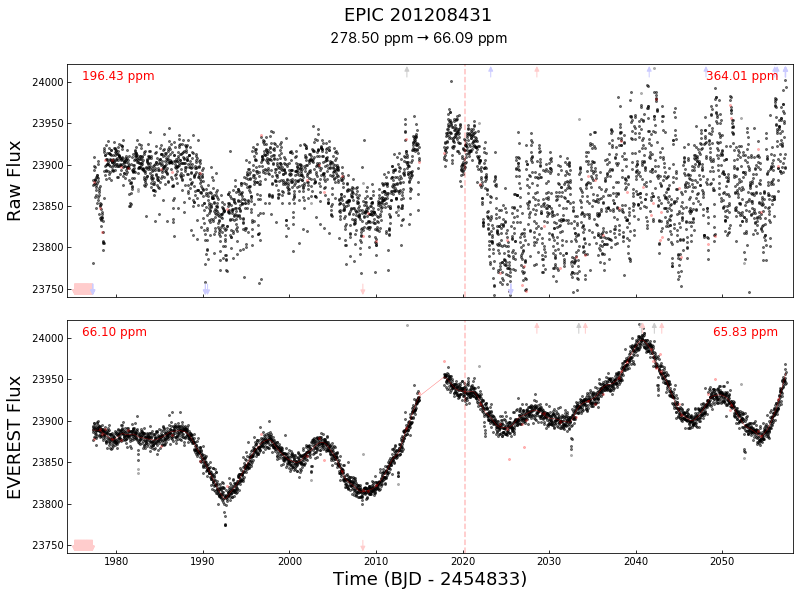

In [69]:
star.plot()

In [249]:
mask1 = (star.fcor <= 23850)&(star.time<=1985)&(star.time>=1980)
trans_time1 = star.time[mask1]
trans_fcor1 = star.fcor[mask1]
t0 = trans_time1[trans_fcor1 == trans_fcor1.min()]
t0_g = truncate(t0[0],4)
ti = np.where(star.time == t0)[0][0]

flux = np.where(star.fcor == trans_fcor1.min())[0][0]

y = star.fcor[flux-1:flux+2]
x = star.time[ti-1:ti+2]
t0_g

/Users/zllangford/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.


1982.4933

In [91]:
mask2 = (star.fcor < 23800)&(star.time<2000)&(star.time>1990)
trans_time2 = star.time[mask2]
trans_fcor2 = star.fcor[mask2]
t1 = trans_time2[trans_fcor2 == trans_fcor2.min()]
#t1 = truncate(t1[0],4)
t1

/Users/zllangford/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


(array([849]),)

In [117]:
per_g = truncate((t1-t0_g)[0],4)
per_g

10.0322

In [248]:
a,b,c = np.polyfit(x,y,2)
t0_g = (-b)/(2*a)
t0_g = truncate(t0_g,4)
t0_g

1982.4922

In [73]:
"""MCMC example for transit fitting."""
def lnprior(x):
    """Return the log prior given parameter vector `x`."""
    per, t0, b = x
    if b < -1 or b > 1:
        return -np.inf
    elif per < per_g-2 or per > per_g+2:
        return -np.inf
    elif t0 < t0_g-2 or t0 > t0_g+2:
        return -np.inf
    else:
        return 0.


def lnlike(x, star):
    """Return the log likelihood given parameter vector `x`."""
    ll = lnprior(x)
    if np.isinf(ll):
        return ll, (np.nan, np.nan)
    per, t0, b = x
    model = TransitModel('b', per=per, t0=t0, b=b, rhos=10.)(star.time)
    like, d, vard = star.lnlike(model, full_output=True)
    ll += like
    return ll, (d,)

In [63]:
# Set up the MCMC sampler
params = ['Period (days)', r't$_0$ (BJD - 2454833)', 'Impact parameter']
blobs = ['Depth (%)']
nsteps = 5000
nburn = 500
nwalk = 10
ndim = len(params)
nblobs = len(blobs)
sampler = emcee.EnsembleSampler(nwalk, ndim, lnlike, args=[star])
x0 = [[per_g + 0.1 * np.random.randn(),
       t0_g + 0.01 * np.random.randn(),
       0. + 0.1 * np.random.randn()] for k in range(nwalk)]
blobs0 = [[0.] for k in range(nwalk)]

# Run!
for _ in tqdm(sampler.sample(x0, iterations=nsteps, blobs0=blobs0),
              total=nsteps):
        pass
#sampler.run_mcmc(x0,N=nsteps);

DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position

DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos


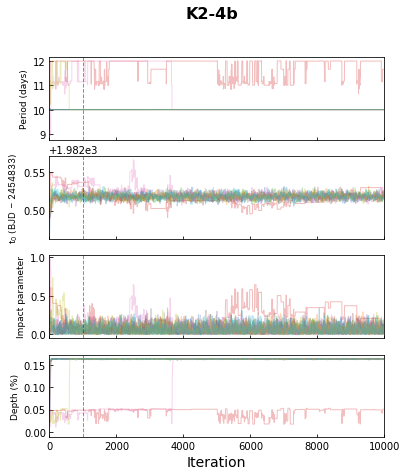

DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position

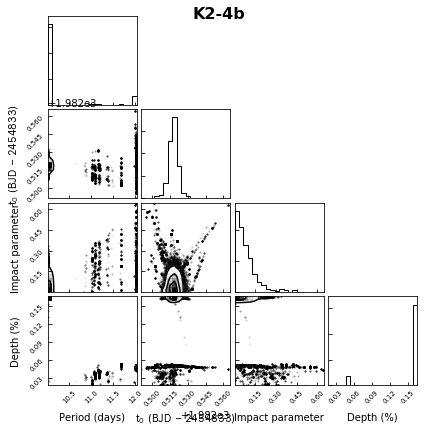

In [214]:
# Add the blobs to the chain for plotting
chain = np.concatenate((sampler.chain,
                        np.array(sampler.blobs).swapaxes(0, 1)), axis=2)

# Re-scale the transit time for prettier axes labels
#chain[:, :, 1] -= t0_g

# Take the absolute value of the impact parameter for plotting
chain[:, :, 2] = np.abs(chain[:, :, 2])

# Re-scale the transit depth as a percentage
chain[:, :, 3] *= 100.

# Plot the chains
fig1, ax = pl.subplots(ndim + nblobs, figsize=(6, 7))
fig1.suptitle("K2-4b", fontsize=16, fontweight='bold')
ax[-1].set_xlabel("Iteration", fontsize=14)
for n in range(ndim + nblobs):
    for k in range(nwalk):
        ax[n].plot(chain[k, :, n], alpha=0.3, lw=1)
    ax[n].set_ylabel((params + blobs)[n], fontsize=9)
    ax[n].margins(0, None)
    ax[n].axvline(nburn, color='b', alpha=0.5, lw=1, ls='--')
    if n < ndim+nblobs-1:
        ax[n].xaxis.set_major_formatter(plt.NullFormatter())
fig1.savefig("k2-4b_chains.png", bbox_inches='tight')

# Plot the posterior distributions
samples = chain[:, nburn:, :].reshape(-1, ndim + nblobs)
fig2 = corner(samples, labels=params + blobs)
fig2.suptitle("K2-4b", fontsize=16, fontweight='bold')
fig2.set_size_inches(6, 6)
for ax in fig2.axes:
    for tick in ax.get_xticklabels() + ax.get_yticklabels():
        tick.set_fontsize(7)
fig2.savefig("k2-4b_corner.png", bbox_inches='tight');

In [246]:
np.mean(sampler.acceptance_fraction)

0.4819400000000001

DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position

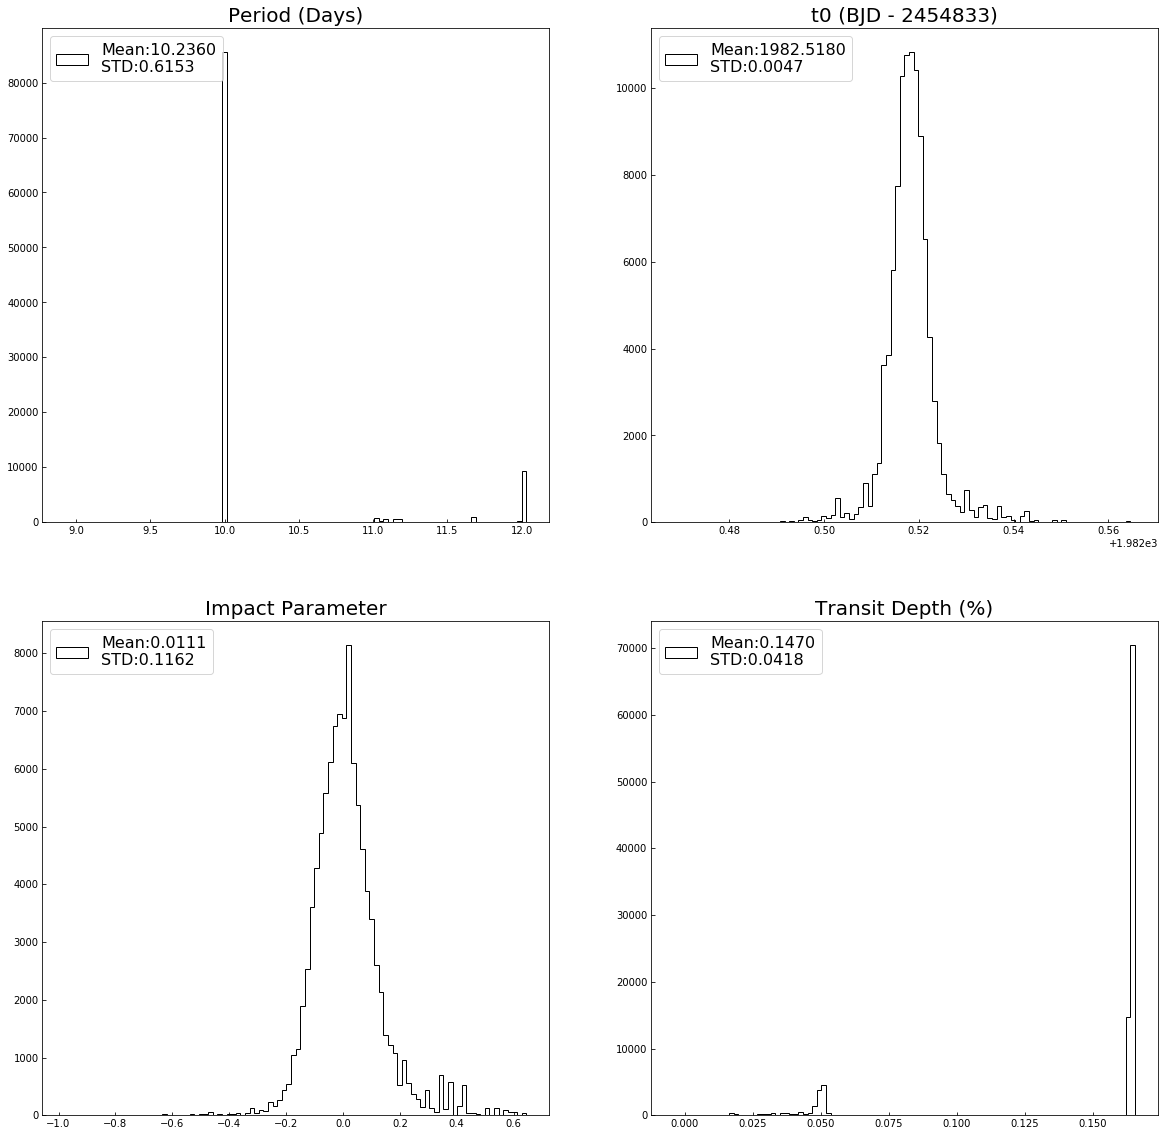

In [259]:
import matplotlib.pyplot as plt

samples = sampler.chain[:, nburn:, :].reshape((-1, ndim))
blobsplot = np.array(sampler.blobs).flatten()

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=[20,20])
ax1.hist(sampler.flatchain[:,0], 100, color="k", histtype="step",
         label='Mean:{0:.4f}\nSTD:{1:.4f}'.format(np.mean(samples[:,0]),
                                              np.std(samples[:,0])))
ax1.set_title("Period (Days)",size=20)
ax1.legend(loc=2,prop={'size': 16})

ax2.hist(sampler.flatchain[:,1], 100, color="k", histtype="step",
         label='Mean:{0:.4f}\nSTD:{1:.4f}'.format(np.mean(samples[:,1]),
                                              np.std(samples[:,1])))
ax2.set_title("t0 (BJD - 2454833)",size=20)
ax2.legend(loc=2,prop={'size': 16})

ax3.hist(sampler.flatchain[:,2], 100, color="k", histtype="step",
         label='Mean:{0:.4f}\nSTD:{1:.4f}'.format(np.mean(samples[:,2]),
                                              np.std(samples[:,2])))
ax3.set_title("Impact Parameter",size=20)
ax3.legend(loc=2,prop={'size': 16})

ax4.hist(blobsplot*100, 100, color="k", histtype="step",
         label='Mean:{0:.4f}\nSTD:{1:.4f}'.format(np.mean(blobsplot*100),
                                              np.std(blobsplot*100)))
ax4.set_title("Transit Depth (%)",size=20)
ax4.legend(loc=2,prop={'size': 16})

plt.savefig('k24_hist.png')

In [137]:
#blobplots = np.array(sampler.blobs).flatten()

array([0.00036029, 0.00028185, 0.00056662, ..., 0.00163366, 0.0016342 ,
       0.00164006])

In [250]:
Things to talk about
    Why distributions might appear this way
        Solar activity,etc
    Comparison to algebraic value and accepted value
    Discuss Mandel-Agol model, limitations
    MCMC 
    Everest Pixel level decorrelation
    

SyntaxError: invalid syntax (<ipython-input-250-1e4833810936>, line 1)

INFO  [everest.basecamp.compute()]: Computing the model...
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos
DEBUG [matplotlib.axes._base._update_title_position()]: update_title_pos


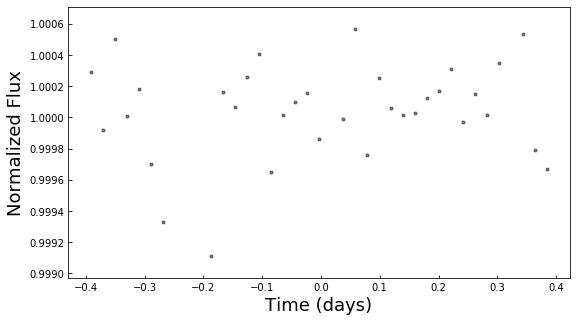

<Figure size 432x288 with 0 Axes>

In [258]:
star.mask_planet(np.mean(samples[:,0]), np.mean(samples[:,1]))
star.compute()
star.plot_folded(np.mean(samples[:,0]), np.mean(samples[:,1]))
plt.savefig('k24_transit.pdf')